In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# homework 2
write a function that takes a probability distribution sample (an unsorted numpy array of numbers that were sampled from a probability distribution) and calculate the high probability density intervals (5%-100% percentile of the probability density). Report all continuous regions as separate intervals. Please test it with the bimodal distribution below and see whether you get two HPD regions instead of just one.
The output should be in the form of a list of intervals (list of two values that brace the interval). For example: [[-4.0,0.0],[2.0,6.0]].
The first step is to estimate the probability density which you can get by binning the data into a histogram (here the challenge is to pick an appropriate binning density).  Then you have to sort the data according to probability density and then picking the HPD data.  After that you need to estimate the continuous intervals of data.

Good luck

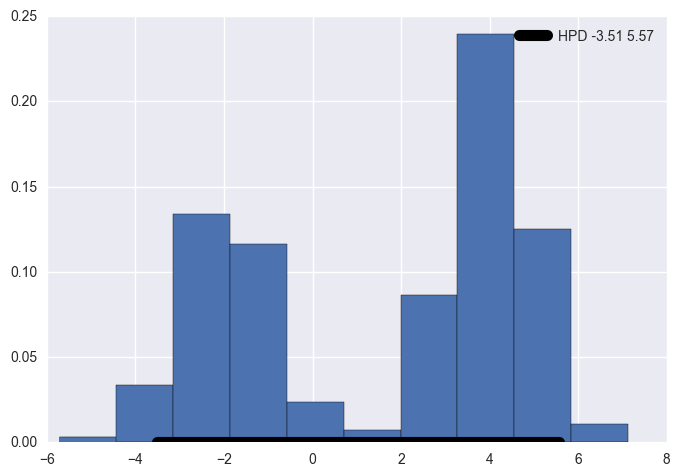

In [3]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)

# mix norm is the input of your function
mix_norm = np.concatenate((gauss_a, gauss_b))

HPD = np.percentile(mix_norm,[2.5,97.5])
plt.hist(mix_norm, normed=True)
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='k')
plt.legend(fontsize=10)

In [4]:
len(mix_norm)

5000

In [5]:
#first sort the sample
mix_norm.sort()

In [6]:
#hint
# create histogram by binning
hist, edges = np.histogram(mix_norm, bins=40)

In [7]:
# calculate cumulative sum of hist
# the goal is to create a list of lists that contain the elements in the bins
cum = np.cumsum(hist)
cum = np.insert(cum,0,0)
print(hist)
print(cum)

[  2   1   5  12  32  42  42  99 166 173 258 262 252 203 165 127  85  39
  18   9   5   7  10  26  52 108 171 223 353 382 431 369 347 243 138  76
  42  16   7   2]
[   0    2    3    8   20   52   94  136  235  401  574  832 1094 1346 1549
 1714 1841 1926 1965 1983 1992 1997 2004 2014 2040 2092 2200 2371 2594 2947
 3329 3760 4129 4476 4719 4857 4933 4975 4991 4998 5000]


In [8]:
# create element list
element_list = [mix_norm[c:c+h] for h,c in zip(hist,cum)]
element_list

[array([-5.711251  , -5.63341046]),
 array([-5.15918507]),
 array([-5.02026914, -4.78746582, -4.78124017, -4.77450086, -4.75512466]),
 array([-4.70588711, -4.70071609, -4.68030131, -4.63229543, -4.61999003,
        -4.54641953, -4.51438388, -4.48400159, -4.47943714, -4.45965544,
        -4.43859028, -4.4381373 ]),
 array([-4.42244002, -4.42094972, -4.40829249, -4.40670401, -4.36624748,
        -4.36144781, -4.35724582, -4.34466661, -4.33223406, -4.31086332,
        -4.29176702, -4.2826085 , -4.28034979, -4.2724895 , -4.24394009,
        -4.24274318, -4.2403954 , -4.23606711, -4.23131818, -4.21560838,
        -4.21390917, -4.2085968 , -4.20653998, -4.20069577, -4.19628195,
        -4.17081895, -4.16769685, -4.15633838, -4.15107603, -4.13624435,
        -4.121318  , -4.11958916]),
 array([-4.1032348 , -4.0980051 , -4.09117281, -4.08602007, -4.08393508,
        -4.07773626, -4.06913739, -4.06693799, -4.05652552, -4.05558612,
        -4.05464096, -4.05310881, -4.02893991, -4.02401245, -4.0

In [ ]:
# now you need to eliminate the bins that are in the bottom 5 percentile